#Giải thích data
1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |: Huyết áp tâm thu áp lực của máu lên động mạch khi tim co bóp. Con số này luôn được quan tâm hơn cả, vì thể hiện được khả năng bơm máu của tim cung cấp đến các cơ quan.
6. Diastolic blood pressure | Examination Feature | ap_lo | int |: Huyết áp tâm trương áp lực máu lên thành động mạch khi tim giãn ra. Không được như huyết áp tâm thu, con số này thường ít được chú ý đến, do chỉ phản ánh khả năng đàn hồi của thành mạch mà yếu tố này thì khó có thể thay đổi được.
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |: Chỉ số cholesterol trong máu với các mức: < 200mg/dl là normal, 200 - 239mg/dl là above normal và > 240mg/dl là well above normal
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |: Chỉ số glucose máu bình thường nằm ở mức dưới 100 mg/dL khi không ăn (nhịn ăn) trong ít nhất 8 giờ, và thấp hơn 140 mg/dL sau khi ăn 2 giờ.
9. Smoking | Subjective Feature | smoke | binary |: Người đó có hút thuốc hay không?
10. Alcohol intake | Subjective Feature | alco | binary |: Người đó có uống rượu hay không?
11. Physical activity | Subjective Feature | active | binary |: Người đó có hoạt động thể chất hay không?
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |: Người đó có mắc bệnh hay không?

Link data: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score,precision_score

In [ ]:
data=pd.read_csv("/content/cardio_train.csv", delimiter=';')

In [ ]:
data.shape

(70000, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
for col in data.columns:
  print(col)
  print(data[col].unique())

id
[    0     1     2 ... 99996 99998 99999]
age
[18393 20228 18857 ... 14925 17727 17926]
gender
[2 1]
height
[168 156 165 169 151 157 178 158 164 173 181 172 170 154 162 163 153 159
 166 155 160 175 171 152 187 148 179 180 188 185 167 183 174 176 161 184
 177 182  76 149 142 150 144 147 186 146 141 195 140 198 145 143 196 138
 194 190 134 136 100 120 189 137 192 122 250 191 117  70  97 119 130 110
 193  75 132  71 135  67 125 139 133  74  98 112 207  68  55  81  80  64
  91  60 109  72 197  65 128 105 108 200 104 111 113  96 131  59  66  99
  57]
weight
[ 62.    85.    64.    82.    56.    67.    93.    95.    71.    68.
  80.    60.    78.   112.    75.    52.    83.    69.    90.    45.
  65.    59.    66.    74.   105.    73.    55.    70.    72.    63.
  50.   107.    84.    77.    79.    76.    58.   115.    97.    53.
  57.    49.   110.    94.    92.    87.   103.    88.    99.   100.
  61.    48.    54.    51.    47.    91.   104.    81.    98.   108.
  89.   101.    86.    6

In [ ]:
def DisposalData(data):
  data.drop('id',axis=1,inplace=True)
  data["bmi"]=data["weight"]/((data["height"]/100)**2)
  data.drop(["height","weight"],axis=1,inplace=True)
  data['age']=(data['age']/365).round(0).astype(int)
  data['gender'].replace({2:1,1:0},inplace=True)

In [ ]:
DisposalData(data)
data

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,1,110,80,1,1,0,0,1,0,21.967120
1,55,0,140,90,3,1,0,0,1,1,34.927679
2,52,0,130,70,3,1,0,0,0,1,23.507805
3,48,1,150,100,1,1,0,0,1,1,28.710479
4,48,0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...
69995,53,1,120,80,1,1,1,0,1,0,26.927438
69996,62,0,140,90,2,2,0,0,1,1,50.472681
69997,52,1,180,90,3,1,0,1,0,1,31.353579
69998,61,0,135,80,1,2,0,0,0,1,27.099251


In [ ]:
num_columns = [ 'age', 'bmi','ap_hi','ap_lo']
labels_num = ['Age','BMI','Systolic blood pressure','Diastolic blood pressure']
nominal_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
labels_nominal = ['Gender ','Cholesterol','Glucose','Smoking','Alcohol intake','Physical activity']

In [ ]:
def drawBoxplot(data,column,labels):

  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
  axes = axes.flatten()
  for i, (col, label) in enumerate(zip(column, labels)):
      sns.boxplot(data[col], ax=axes[i])
      axes[i].set_xlabel(col)
      axes[i].set_ylabel('Values')
      axes[i].set_title(f'Distribution of {label}')

  plt.tight_layout()
  plt.show()

In [ ]:
def drawHistplot(data,column,labels):

  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
  axes = axes.flatten()
  for i, (col, label) in enumerate(zip(column, labels)):
      sns.histplot(data[col], kde=True, ax=axes[i], bins=20)
      axes[i].set_xlabel(col)
      axes[i].set_ylabel('Frequency')
      axes[i].set_title(f'Distribution of {label}')

  plt.tight_layout()
  plt.show()

In [ ]:
def drawCountplot(data,column,labels):

  fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
  axes = axes.flatten()

  for i, (col, label) in enumerate(zip(column, labels)):
      sns.countplot(data=data, x=col, hue='cardio', ax=axes[i], palette='Set2')
      axes[i].set_xlabel(col)
      axes[i].set_ylabel('Count')
      axes[i].legend(title='Target', loc='upper right')
      axes[i].set_title(f'Distribution of {label}')

  plt.tight_layout()
  plt.show()

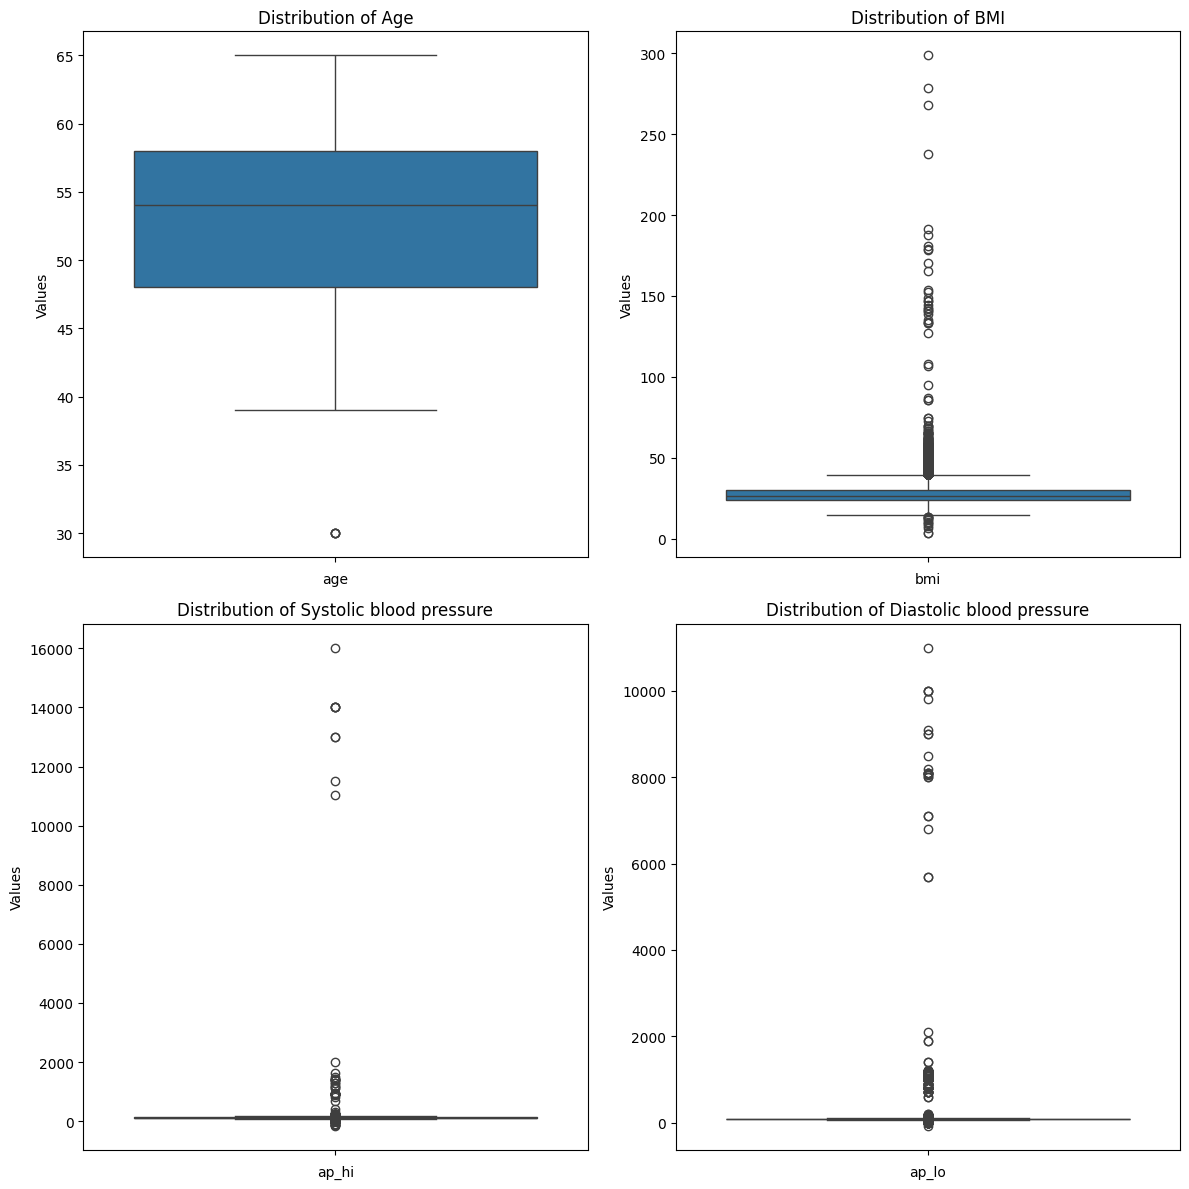

In [ ]:
drawBoxplot(data,num_columns,labels_num)

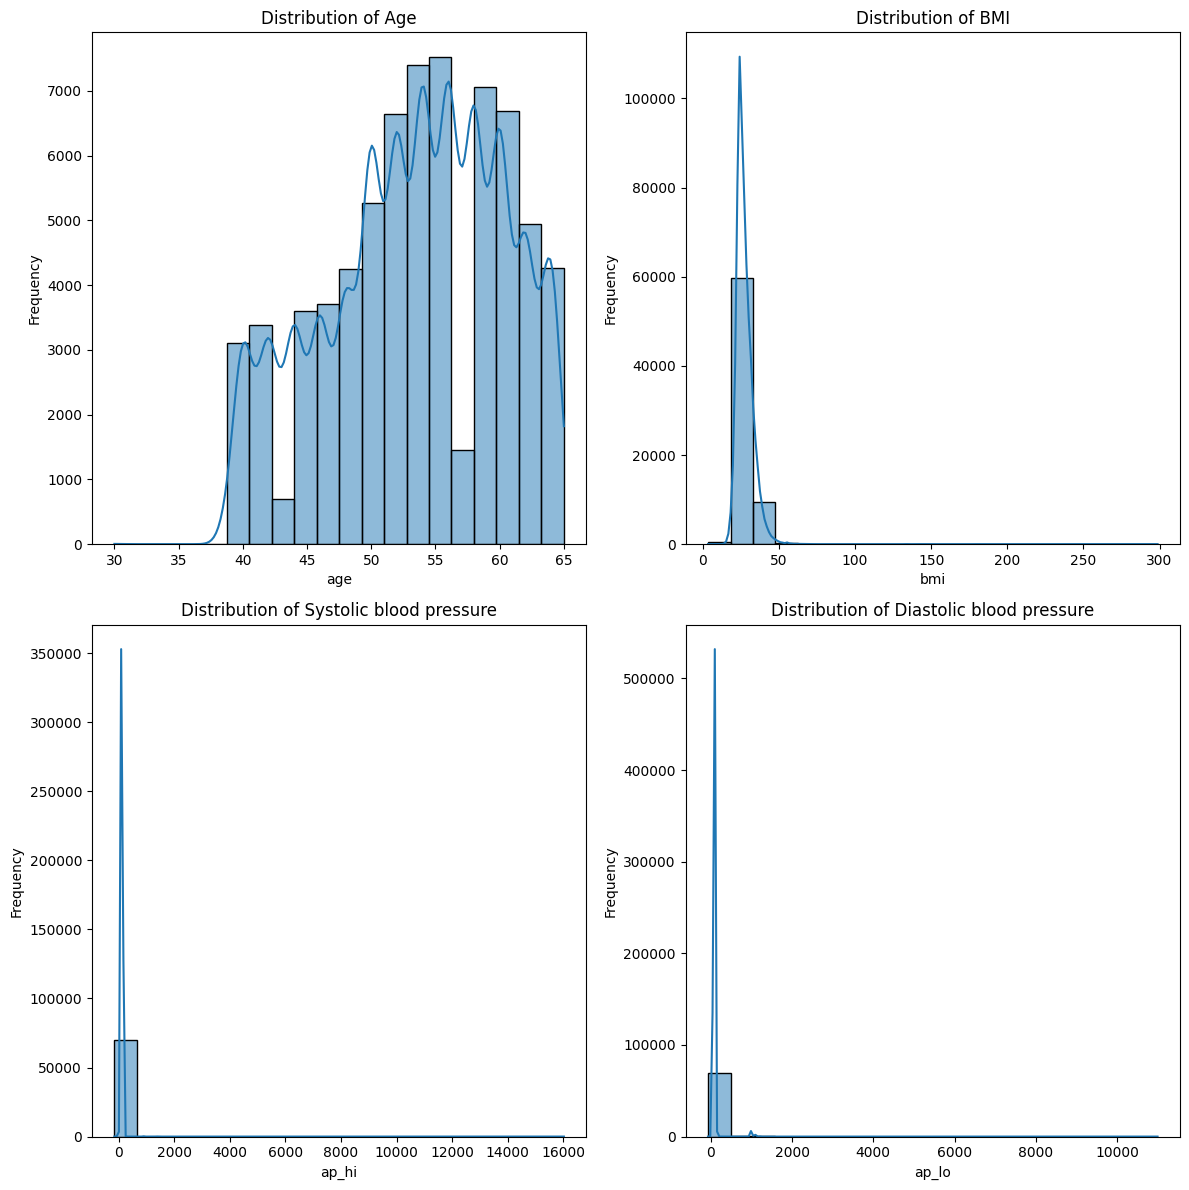

In [ ]:
drawHistplot(data,num_columns,labels_num)

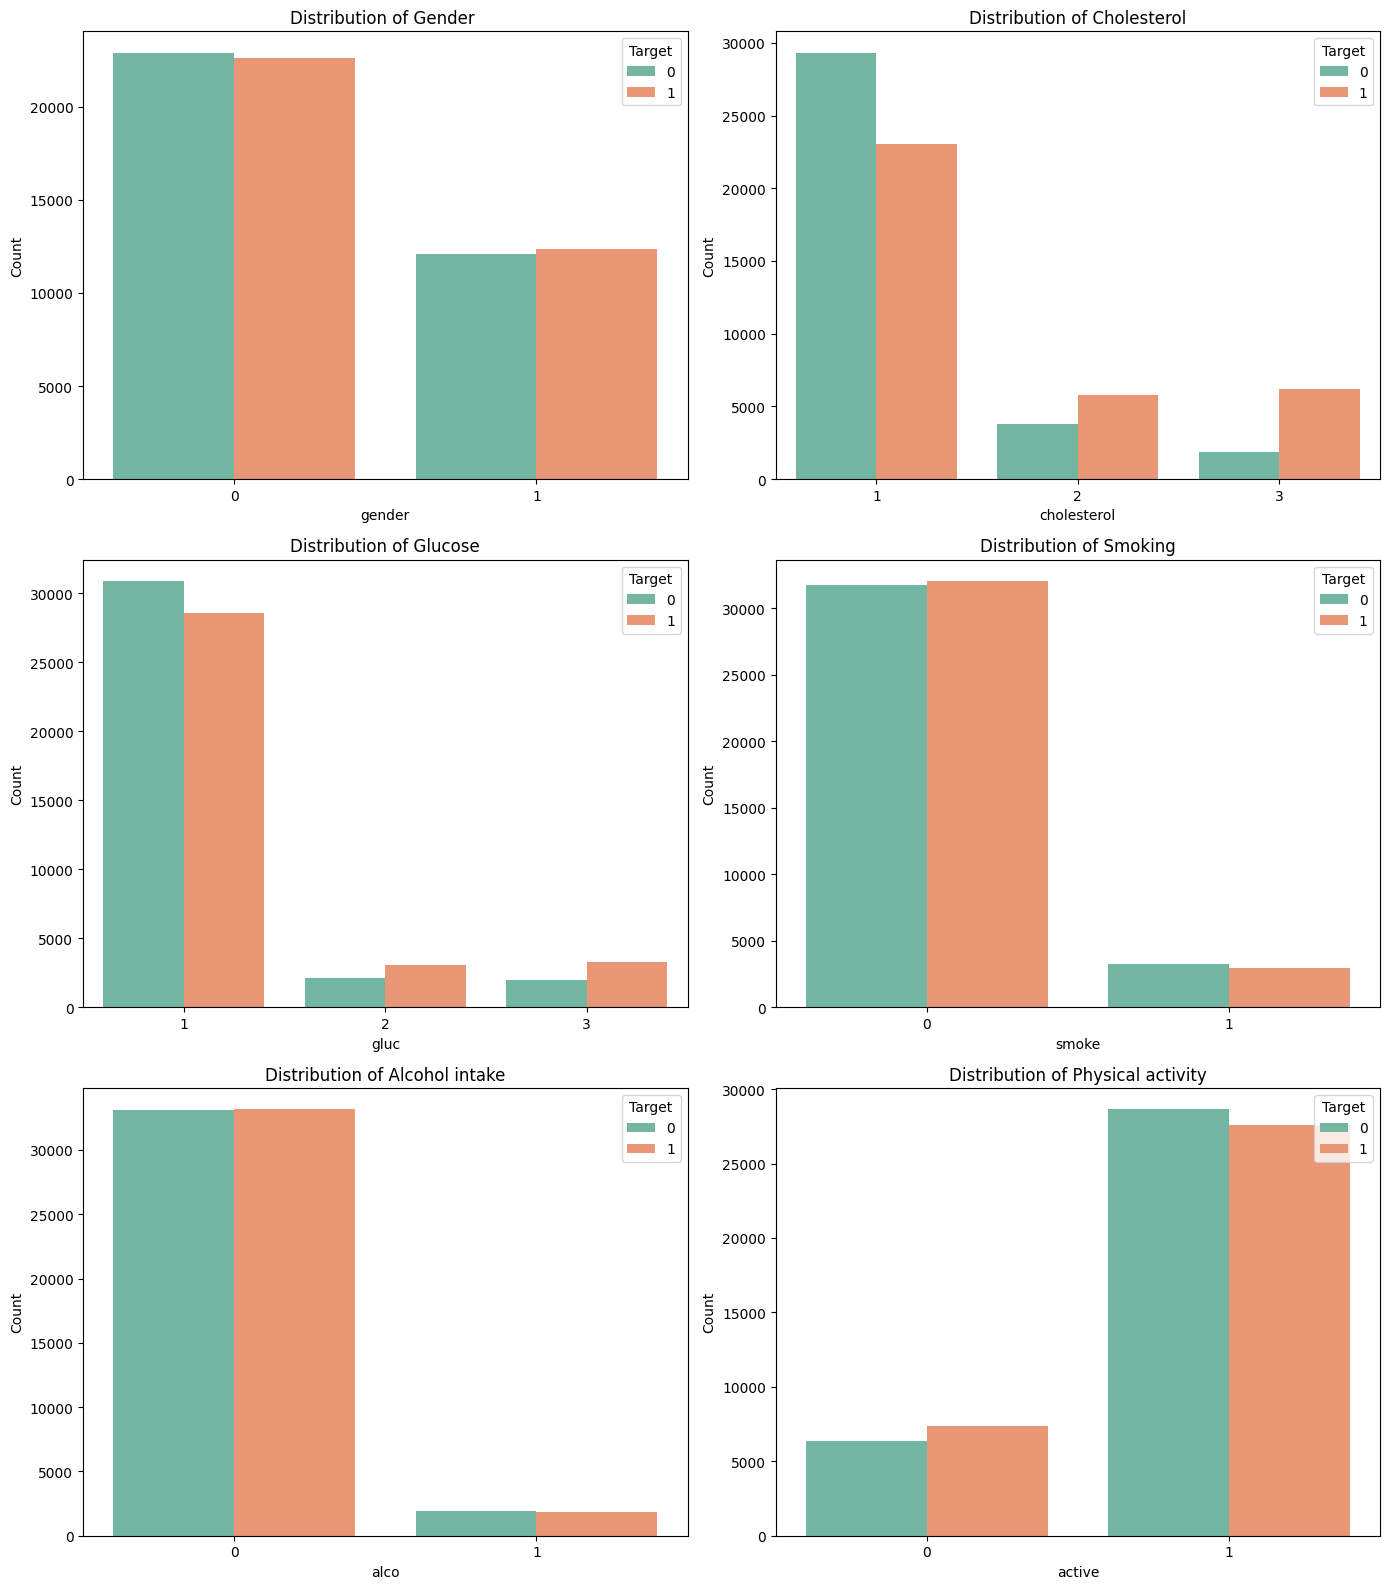

In [ ]:
drawCountplot(data,nominal_columns,labels_nominal)

In [ ]:
def xuLiOutlier(data,column):
  q1=data[column].quantile(0.25)
  q3=data[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  df_filter=data[(data[column]>=lower_bound)&(data[column]<=upper_bound)]
  return df_filter

In [ ]:
data_no_outlier=data.copy()
for col in num_columns:
  data_no_outlier=xuLiOutlier(data_no_outlier,col)

In [ ]:
data_no_outlier

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,1,110,80,1,1,0,0,1,0,21.967120
1,55,0,140,90,3,1,0,0,1,1,34.927679
2,52,0,130,70,3,1,0,0,0,1,23.507805
3,48,1,150,100,1,1,0,0,1,1,28.710479
5,60,0,120,80,2,2,0,0,0,0,29.384676
...,...,...,...,...,...,...,...,...,...,...,...
69993,54,0,130,90,1,1,0,0,1,1,23.661439
69994,58,0,150,80,1,1,0,0,1,1,29.384757
69995,53,1,120,80,1,1,1,0,1,0,26.927438
69998,61,0,135,80,1,2,0,0,0,1,27.099251


In [ ]:
data_no_outlier.drop_duplicates(inplace=True)

In [ ]:
data_no_outlier.shape

(58950, 11)

In [ ]:
data_no_outlier['cardio'].value_counts()

cardio
1    29976
0    28974
Name: count, dtype: int64

In [ ]:
# data_0=data_no_outlier[data_no_outlier['cardio']==0]
# data_1=data_no_outlier[data_no_outlier['cardio']==1]

In [ ]:
# df_class_0=data_0.sample(10000)
# df_class_1=data_1.sample(10000)
# df=pd.concat([df_class_0,df_class_1])
df=data_no_outlier.copy()
# df=data_no_outlier.sample(n=20000,random_state=42)
# df

In [ ]:
df

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,1,110,80,1,1,0,0,1,0,21.967120
1,55,0,140,90,3,1,0,0,1,1,34.927679
2,52,0,130,70,3,1,0,0,0,1,23.507805
3,48,1,150,100,1,1,0,0,1,1,28.710479
5,60,0,120,80,2,2,0,0,0,0,29.384676
...,...,...,...,...,...,...,...,...,...,...,...
69993,54,0,130,90,1,1,0,0,1,1,23.661439
69994,58,0,150,80,1,1,0,0,1,1,29.384757
69995,53,1,120,80,1,1,1,0,1,0,26.927438
69998,61,0,135,80,1,2,0,0,0,1,27.099251


In [ ]:
df['cardio'].value_counts()

cardio
1    29976
0    28974
Name: count, dtype: int64

In [ ]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,1,110,80,1,1,0,0,1,0,21.967120
1,55,0,140,90,3,1,0,0,1,1,34.927679
2,52,0,130,70,3,1,0,0,0,1,23.507805
3,48,1,150,100,1,1,0,0,1,1,28.710479
4,60,0,120,80,2,2,0,0,0,0,29.384676
...,...,...,...,...,...,...,...,...,...,...,...
58945,54,0,130,90,1,1,0,0,1,1,23.661439
58946,58,0,150,80,1,1,0,0,1,1,29.384757
58947,53,1,120,80,1,1,1,0,1,0,26.927438
58948,61,0,135,80,1,2,0,0,0,1,27.099251


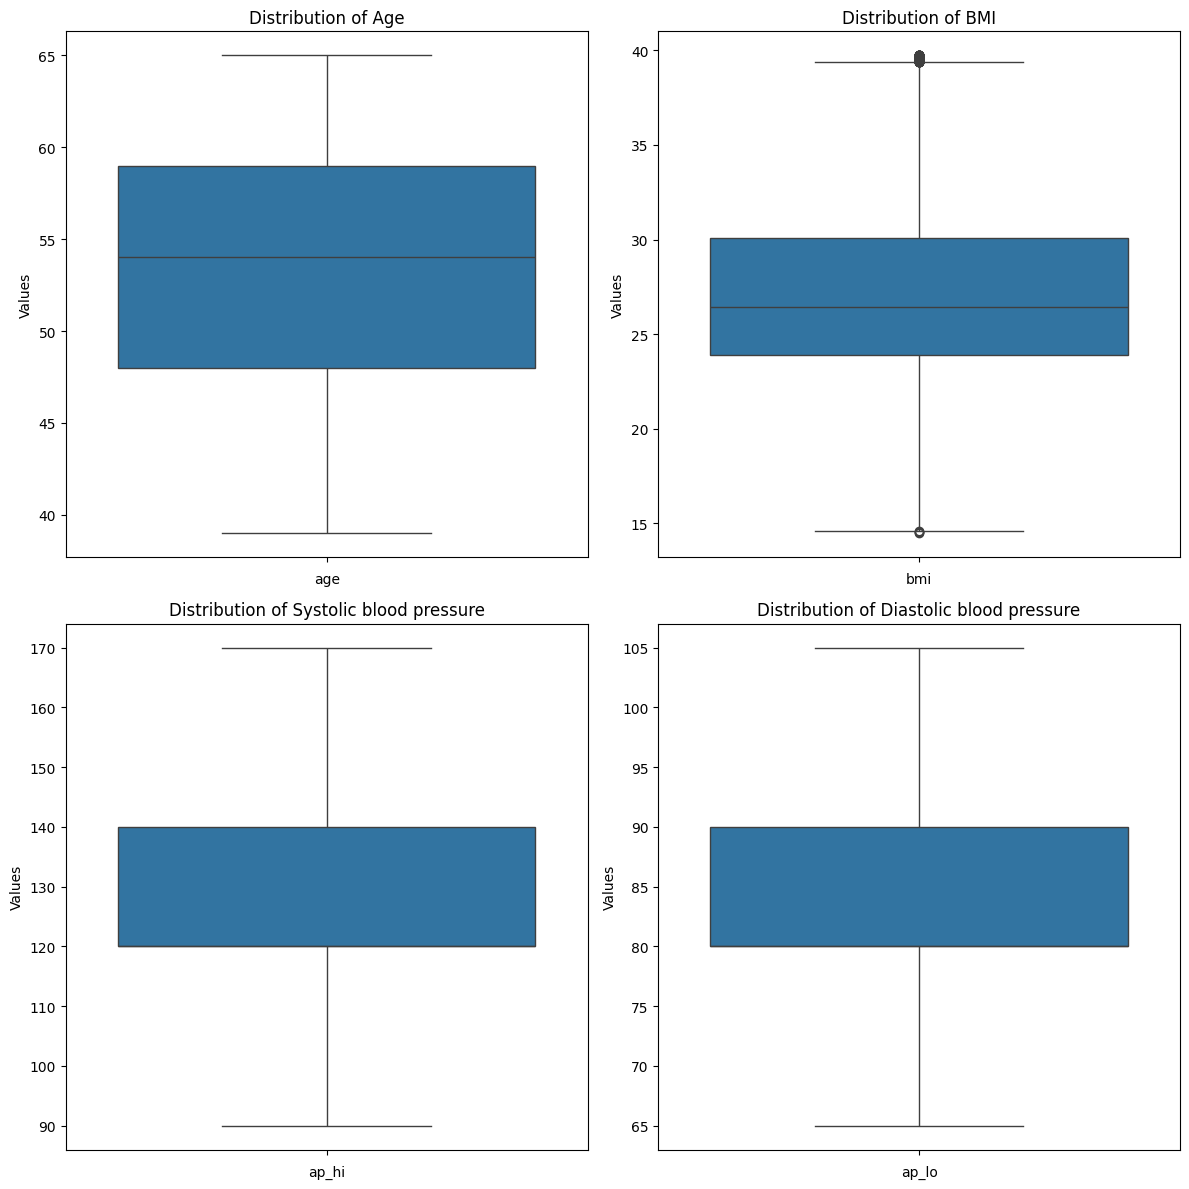

In [ ]:
drawBoxplot(df,num_columns,labels_num)

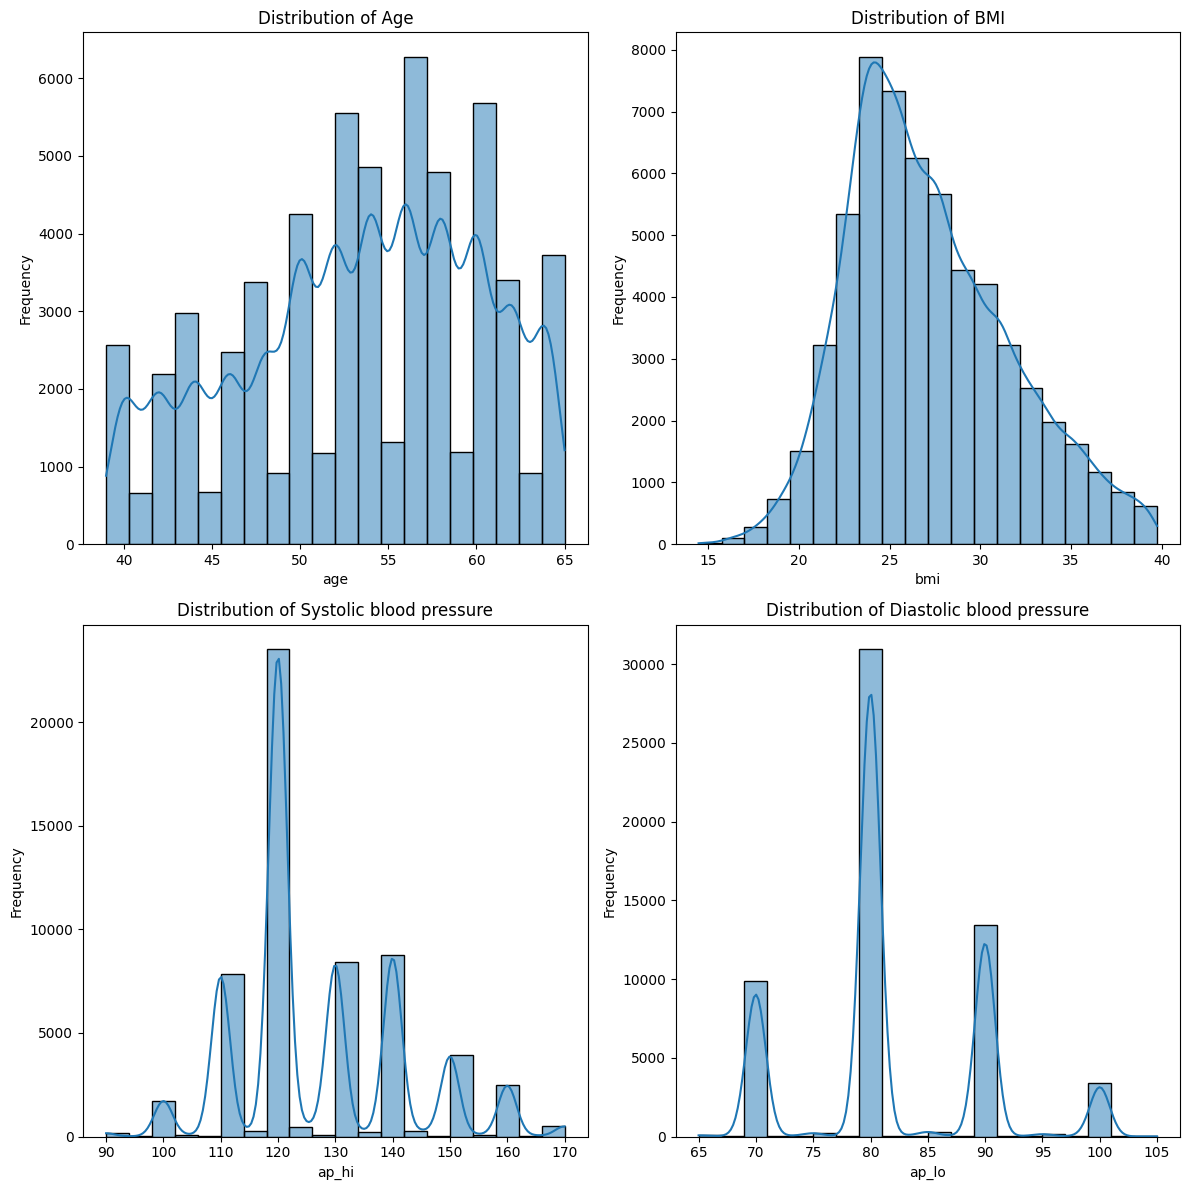

In [ ]:
drawHistplot(df,num_columns,labels_num)

age            0.230286
gender        -0.005550
ap_hi          0.429339
ap_lo          0.334205
cholesterol    0.209716
gluc           0.076095
smoke         -0.027463
alco          -0.018572
active        -0.026687
cardio         1.000000
bmi            0.170347
Name: cardio, dtype: float64


<Axes: >

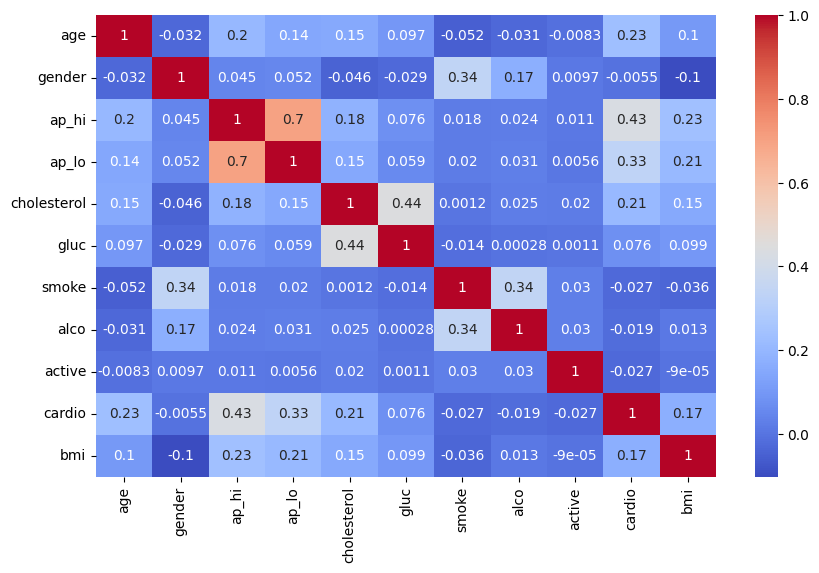

In [ ]:
df_corr=df.corr()
print(df_corr['cardio'])
plt.figure(figsize=(10,6))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif,chi2,mutual_info_classif
label=df['cardio']
value=df.drop('cardio',axis=1)
bestFeature = SelectKBest(score_func=f_classif,k='all')
fit = bestFeature.fit(value,label)
dfScores=np.array(fit.scores_)
dfColumn=np.array(value.columns)
featureScore=pd.DataFrame({'Feature':dfColumn,'Score':dfScores})
featureScore['Score']=featureScore['Score'].apply(lambda x:round(x,2))
featureScore=featureScore.sort_values(['Score'],ascending=False)
featureScore

,Feature,Score
2,ap_hi,13321.63
3,ap_lo,7411.95
0,age,3301.16
4,cholesterol,2711.86
9,bmi,1761.67
5,gluc,343.32
6,smoke,44.49
8,active,42.01
7,alco,20.34
1,gender,1.82


In [ ]:
col=['age','bmi','ap_hi','ap_lo','cholesterol','gluc','cardio']
df_feature=df[col]
df_feature

,age,bmi,ap_hi,ap_lo,cholesterol,gluc,cardio
0,50,21.967120,110,80,1,1,0
1,55,34.927679,140,90,3,1,1
2,52,23.507805,130,70,3,1,1
3,48,28.710479,150,100,1,1,1
4,60,29.384676,120,80,2,2,0
...,...,...,...,...,...,...,...
58945,54,23.661439,130,90,1,1,1
58946,58,29.384757,150,80,1,1,1
58947,53,26.927438,120,80,1,1,0
58948,61,27.099251,135,80,1,2,1


In [ ]:
def assign_age_group(age):

    age_groups = {
    (0, 40): 0,
    (41, 60): 1,
    (61, float('inf')):2
    }

    for age_range, group in age_groups.items():
        if age_range[0] <= age <= age_range[1]:
            return group

In [ ]:
def assign_bmi_group(bmi):

    if bmi < 18.5:
        return 0
    elif bmi < 25:
        return 1
    elif bmi < 30:
        return 2
    else:
        return 3

In [ ]:
df_feature['assign_age']=df_feature['age'].apply(assign_age_group)
df_feature['assign_bmi']=df_feature['bmi'].apply(assign_bmi_group)

<ipython-input-173-51800fe290f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature['assign_age']=df_feature['age'].apply(assign_age_group)
<ipython-input-173-51800fe290f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature['assign_bmi']=df_feature['bmi'].apply(assign_bmi_group)


In [ ]:
# column = ['age', 'bmi']
# df_feature.drop(column, axis=1, inplace=True)
df_feature

,age,bmi,ap_hi,ap_lo,cholesterol,gluc,cardio,assign_age,assign_bmi
0,50,21.967120,110,80,1,1,0,1,1
1,55,34.927679,140,90,3,1,1,1,3
2,52,23.507805,130,70,3,1,1,1,1
3,48,28.710479,150,100,1,1,1,1,2
4,60,29.384676,120,80,2,2,0,1,2
...,...,...,...,...,...,...,...,...,...
58945,54,23.661439,130,90,1,1,1,1,1
58946,58,29.384757,150,80,1,1,1,1,2
58947,53,26.927438,120,80,1,1,0,1,2
58948,61,27.099251,135,80,1,2,1,2,2


In [ ]:
# column = ['cholesterol','gluc', 'assign_age', 'assign_bmi']
# for col in column:
#   onehot_encoder=OneHotEncoder()
#   cholesterol_column_reshaped = df_feature[col].values.reshape(-1, 1)

#   # Fit và transform OneHotEncoder cho cột 'cholesterol'
#   df_onehot = onehot_encoder.fit_transform(cholesterol_column_reshaped)

#   # Chuyển đổi ma trận sparse thành DataFrame
#   df_onehot_df = pd.DataFrame(df_onehot.toarray(), columns=onehot_encoder.get_feature_names_out([col]))

#   # Kết hợp DataFrame gốc với DataFrame mã hóa one-hot
#   df_feature = pd.concat([df_feature, df_onehot_df], axis=1)

In [ ]:

encoded_features = pd.DataFrame()
column=['cholesterol','gluc', 'assign_age', 'assign_bmi']

for col in column:
    onehot_encoder = OneHotEncoder()
    column_reshaped = df_feature[col].values.reshape(-1, 1)
    df_onehot = onehot_encoder.fit_transform(column_reshaped)
    df_onehot_df = pd.DataFrame(df_onehot.toarray(), columns=onehot_encoder.get_feature_names_out([col]))


    encoded_features = pd.concat([encoded_features, df_onehot_df], axis=1)


df_feature.drop(column, axis=1, inplace=True)

df_feature = pd.concat([df_feature, encoded_features], axis=1)

<ipython-input-176-fb53c3cf97fd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature.drop(column, axis=1, inplace=True)


In [ ]:
df_feature.columns

Index(['age', 'bmi', 'ap_hi', 'ap_lo', 'cardio', 'cholesterol_1',
       'cholesterol_2', 'cholesterol_3', 'gluc_1', 'gluc_2', 'gluc_3',
       'assign_age_0', 'assign_age_1', 'assign_age_2', 'assign_bmi_0',
       'assign_bmi_1', 'assign_bmi_2', 'assign_bmi_3'],
      dtype='object')

In [ ]:
df_feature[['cholesterol_1',
       'cholesterol_2', 'cholesterol_3','gluc_1', 'gluc_2', 'gluc_3', 'assign_age_0', 'assign_age_1',
       'assign_age_2', 'assign_bmi_0', 'assign_bmi_1', 'assign_bmi_2',
       'assign_bmi_3']]=df_feature[['cholesterol_1',
       'cholesterol_2', 'cholesterol_3','gluc_1', 'gluc_2', 'gluc_3', 'assign_age_0', 'assign_age_1',
       'assign_age_2', 'assign_bmi_0', 'assign_bmi_1', 'assign_bmi_2',
       'assign_bmi_3']].astype(int)

In [ ]:
df_feature

,age,bmi,ap_hi,ap_lo,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,assign_age_0,assign_age_1,assign_age_2,assign_bmi_0,assign_bmi_1,assign_bmi_2,assign_bmi_3
0,50,21.967120,110,80,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,55,34.927679,140,90,1,0,0,1,1,0,0,0,1,0,0,0,0,1
2,52,23.507805,130,70,1,0,0,1,1,0,0,0,1,0,0,1,0,0
3,48,28.710479,150,100,1,1,0,0,1,0,0,0,1,0,0,0,1,0
4,60,29.384676,120,80,0,0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58945,54,23.661439,130,90,1,1,0,0,1,0,0,0,1,0,0,1,0,0
58946,58,29.384757,150,80,1,1,0,0,1,0,0,0,1,0,0,0,1,0
58947,53,26.927438,120,80,0,1,0,0,1,0,0,0,1,0,0,0,1,0
58948,61,27.099251,135,80,1,1,0,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
scaler = MinMaxScaler()
numerical_cols = ['age','bmi','ap_hi','ap_lo']
df_feature[numerical_cols] = scaler.fit_transform(df_feature[numerical_cols])
df_feature

,age,bmi,ap_hi,ap_lo,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,assign_age_0,assign_age_1,assign_age_2,assign_bmi_0,assign_bmi_1,assign_bmi_2,assign_bmi_3
0,0.423077,0.296462,0.2500,0.375,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0.615385,0.809617,0.6250,0.625,1,0,0,1,1,0,0,0,1,0,0,0,0,1
2,0.500000,0.357463,0.5000,0.125,1,0,0,1,1,0,0,0,1,0,0,1,0,0
3,0.346154,0.563455,0.7500,0.875,1,1,0,0,1,0,0,0,1,0,0,0,1,0
4,0.807692,0.590149,0.3750,0.375,0,0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58945,0.576923,0.363546,0.5000,0.625,1,1,0,0,1,0,0,0,1,0,0,1,0,0
58946,0.730769,0.590152,0.7500,0.375,1,1,0,0,1,0,0,0,1,0,0,0,1,0
58947,0.538462,0.492858,0.3750,0.375,0,1,0,0,1,0,0,0,1,0,0,0,1,0
58948,0.846154,0.499661,0.5625,0.375,1,1,0,0,0,1,0,0,0,1,0,0,1,0


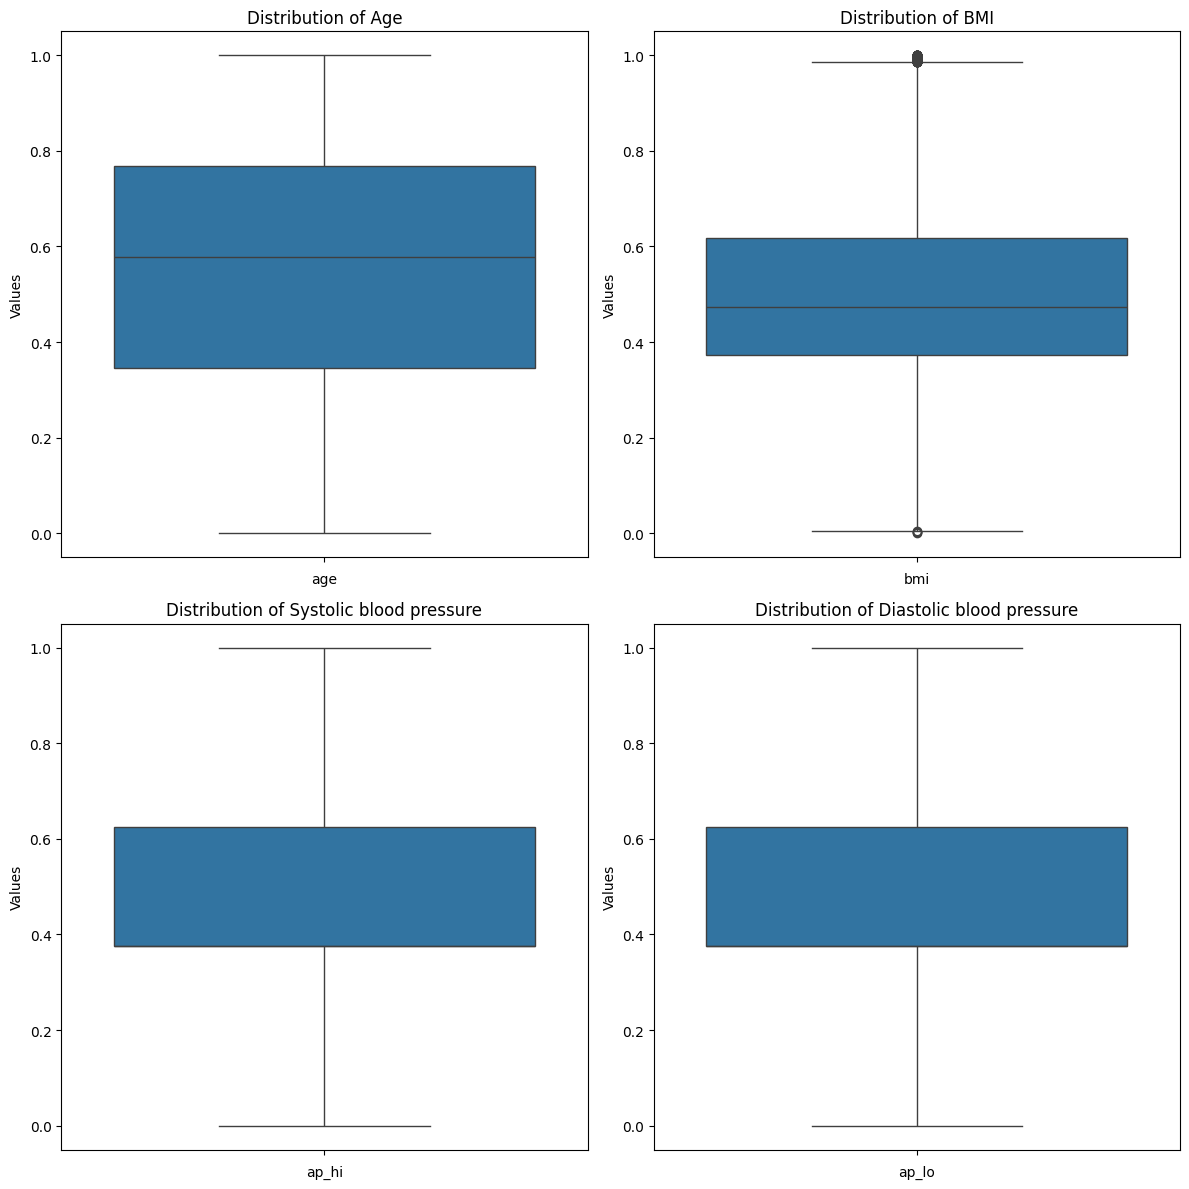

In [ ]:
drawBoxplot(df_feature,num_columns,labels_num)

In [ ]:
# onehot_encoder=OneHotEncoder()
# cholesterol_column_reshaped = df_feature['cholesterol'].values.reshape(-1, 1)

# # Fit và transform OneHotEncoder cho cột 'cholesterol'
# df_onehot = onehot_encoder.fit_transform(cholesterol_column_reshaped)

# # Chuyển đổi ma trận sparse thành DataFrame
# df_onehot_df = pd.DataFrame(df_onehot.toarray(), columns=onehot_encoder.get_feature_names_out(['cholesterol']))

# # Kết hợp DataFrame gốc với DataFrame mã hóa one-hot
# df_encoded = pd.concat([df_feature, df_onehot_df], axis=1)

In [ ]:
# df_encoded.drop('cholesterol',axis=1,inplace=True)

In [ ]:
# df_encoded[['cholesterol_1','cholesterol_2','cholesterol_3']]=df_encoded[['cholesterol_1','cholesterol_2','cholesterol_3']].astype(int)

In [ ]:
df_encoded=df_feature.copy()

In [ ]:
X=df_encoded.drop('cardio',axis=1)
y=df_encoded['cardio']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((47160, 17), (11790, 17), (47160,), (11790,))

In [ ]:
X_test

,age,bmi,ap_hi,ap_lo,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,assign_age_0,assign_age_1,assign_age_2,assign_bmi_0,assign_bmi_1,assign_bmi_2,assign_bmi_3
57519,0.076923,0.640996,0.625,0.625,0,0,1,0,0,1,0,1,0,0,0,0,1
12986,0.730769,0.526210,0.375,0.375,1,0,0,1,0,0,0,1,0,0,0,1,0
8528,0.730769,0.124557,0.375,0.375,1,0,0,0,1,0,0,1,0,1,0,0,0
53825,0.576923,0.394660,0.750,0.625,0,1,0,1,0,0,0,1,0,0,1,0,0
29569,0.730769,0.534943,0.250,0.125,0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56289,0.846154,0.383569,0.625,0.375,0,0,1,1,0,0,0,0,1,0,1,0,0
37787,0.500000,0.931824,0.125,0.375,1,0,0,0,1,0,0,1,0,0,0,0,1
34412,0.576923,0.433866,0.500,0.625,0,1,0,1,0,0,0,1,0,0,0,1,0
50473,0.884615,0.523480,0.375,0.375,1,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
y_test

57519    1
12986    1
8528     0
53825    1
29569    1
        ..
56289    0
37787    0
34412    0
50473    1
55263    1
Name: cardio, Length: 11790, dtype: int64

In [ ]:
accuracy_list = []
f1=[]

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
dataset_resampled, label_resampled = smote.fit_resample(X, y)

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled \
    = train_test_split(dataset_resampled, label_resampled, test_size=0.2, stratify=label_resampled, random_state=42)

In [ ]:
X_train=X_train_resampled.copy()
X_test=X_test_resampled.copy()
y_train=y_train_resampled.copy()
y_test=y_test_resampled.copy()
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((47961, 17), (11991, 17), (47961,), (11991,))

#Train với các mô hình

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


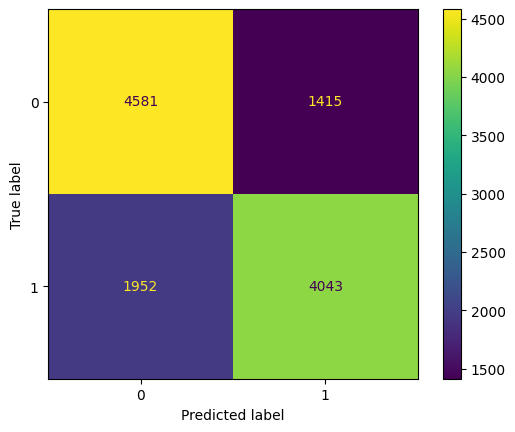

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_prediction = lr_model.predict(X_test)
lr_accuracy = (round(accuracy_score(lr_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(lr_accuracy)
f1.append(f1_score(y_test, lr_prediction, average='weighted'))
cm = confusion_matrix(y_test,lr_prediction )
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
report = classification_report(y_test, lr_prediction)

# In báo cáo
print(report)

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      5996
           1       0.74      0.67      0.71      5995

    accuracy                           0.72     11991
   macro avg       0.72      0.72      0.72     11991
weighted avg       0.72      0.72      0.72     11991



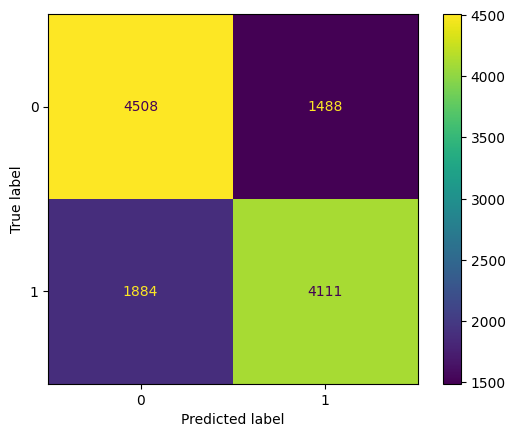

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_prediction = svc_model.predict(X_test)
svc_accuracy = (round(accuracy_score(svc_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(svc_accuracy)
f1.append(f1_score(y_test, svc_prediction, average='weighted'))
cm = confusion_matrix(y_test,svc_prediction )
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
report = classification_report(y_test, svc_prediction)

# In báo cáo
print(report)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      5996
           1       0.73      0.69      0.71      5995

    accuracy                           0.72     11991
   macro avg       0.72      0.72      0.72     11991
weighted avg       0.72      0.72      0.72     11991



0    14
dtype: int64


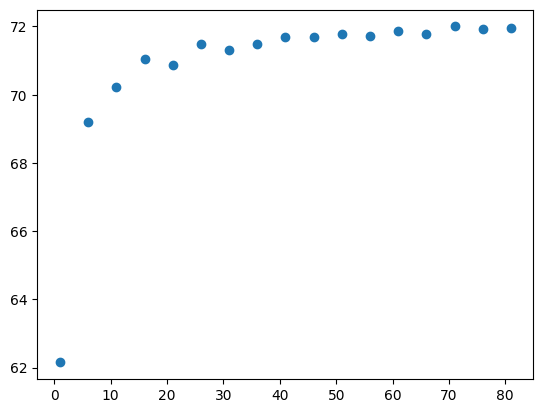

In [ ]:
knn_list = []
for k in range(1,82,5):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_prediction = knn_model.predict(X_test)
    knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100)
    knn_list.append(knn_accuracy)
k = np.arange(1,82,5)
knn_list = pd.DataFrame(knn_list)
print(knn_list.idxmax())
plt.scatter(k, knn_list)

In [ ]:
print(np.array(knn_list))

[[62.15]
 [69.19]
 [70.22]
 [71.05]
 [70.87]
 [71.5 ]
 [71.3 ]
 [71.48]
 [71.68]
 [71.69]
 [71.79]
 [71.71]
 [71.86]
 [71.77]
 [72.  ]
 [71.92]
 [71.95]]


72.0


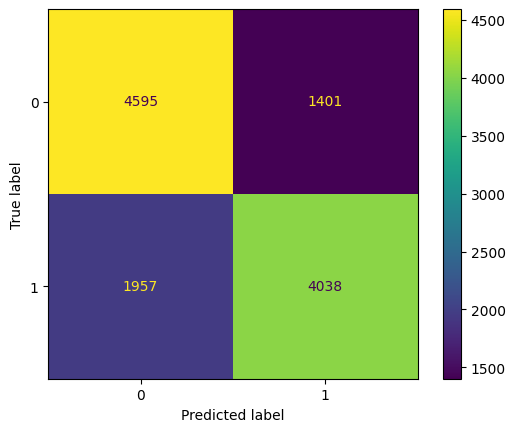

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=71)
knn_model.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)
knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(knn_accuracy)
f1.append(f1_score(y_test, knn_prediction, average='weighted'))
print(knn_accuracy)
cm = confusion_matrix(y_test,knn_prediction )
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
report = classification_report(y_test, knn_prediction)

# In báo cáo
print(report)

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      5996
           1       0.74      0.67      0.71      5995

    accuracy                           0.72     11991
   macro avg       0.72      0.72      0.72     11991
weighted avg       0.72      0.72      0.72     11991



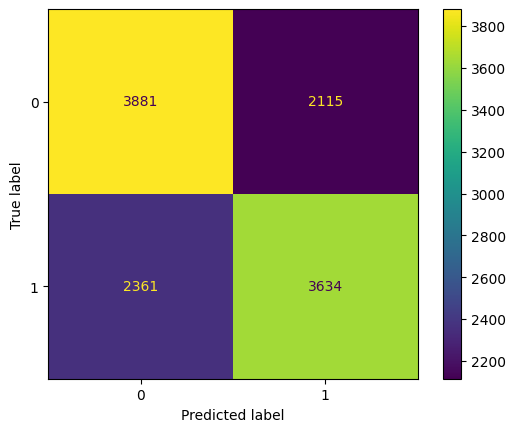

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_prediction = dt_model.predict(X_test)
dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(dt_accuracy)
f1.append(f1_score(y_test, dt_prediction, average='weighted'))
cm = confusion_matrix(y_test,dt_prediction )
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
report = classification_report(y_test, dt_prediction)

# In báo cáo
print(report)

              precision    recall  f1-score   support

           0       0.62      0.65      0.63      5996
           1       0.63      0.61      0.62      5995

    accuracy                           0.63     11991
   macro avg       0.63      0.63      0.63     11991
weighted avg       0.63      0.63      0.63     11991



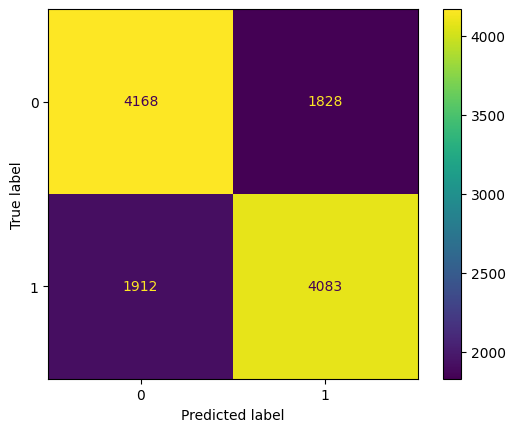

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_prediction = nb_model.predict(X_test)
nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(nb_accuracy)
f1.append(f1_score(y_test, nb_prediction, average='weighted'))
cm = confusion_matrix(y_test,nb_prediction )
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
report = classification_report(y_test, nb_prediction)

# In báo cáo
print(report)

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      5996
           1       0.69      0.68      0.69      5995

    accuracy                           0.69     11991
   macro avg       0.69      0.69      0.69     11991
weighted avg       0.69      0.69      0.69     11991



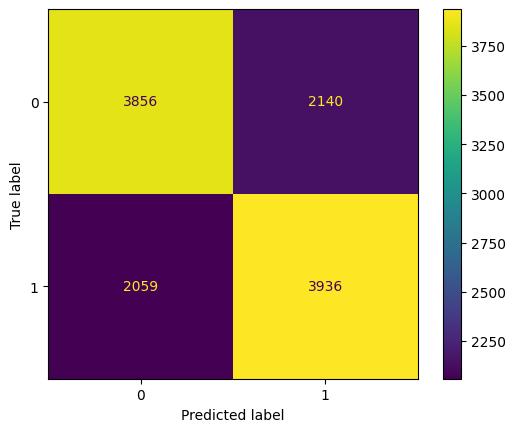

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)
rf_accuracy = (round(accuracy_score(rf_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(rf_accuracy)
f1.append(f1_score(y_test, rf_prediction, average='weighted'))
cm = confusion_matrix(y_test,rf_prediction )
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
report = classification_report(y_test, rf_prediction)

# In báo cáo
print(report)

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      5996
           1       0.65      0.66      0.65      5995

    accuracy                           0.65     11991
   macro avg       0.65      0.65      0.65     11991
weighted avg       0.65      0.65      0.65     11991



In [ ]:
accuracy_list

[71.92, 71.88, 72.0, 62.67, 68.81, 64.98]

In [ ]:
f1

[0.7186407326646896,
 0.7184812813666451,
 0.7091205112325961,
 0.7193521532494845,
 0.6265622279500824,
 0.6880839188161851,
 0.649804916422709]

<ipython-input-80-3acd421d6f90>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracy_list, palette=colors)


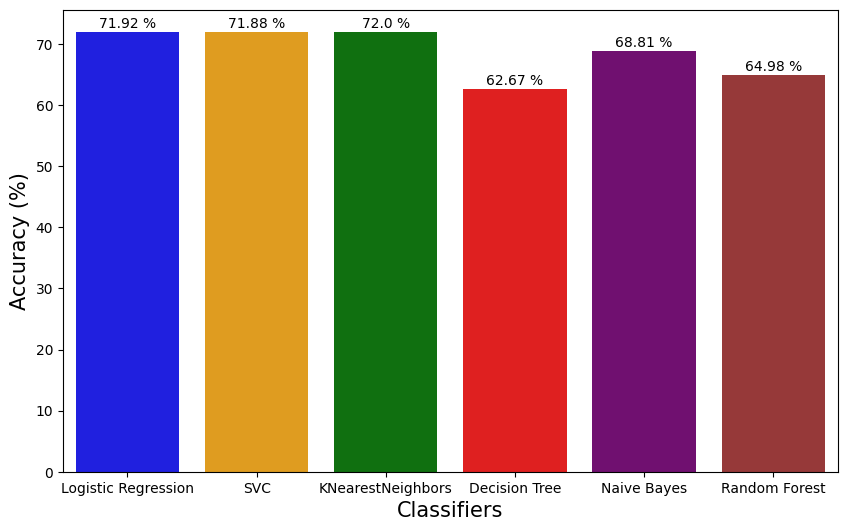

In [ ]:
models = ["Logistic Regression","SVC","KNearestNeighbors","Decision Tree","Naive Bayes","Random Forest"]
colors = ["blue", "orange", "green", "red", "purple", "brown"]
plt.figure(figsize=(10,6))
ax = sns.barplot(x=models, y=accuracy_list, palette=colors)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x_draw = p.get_x()
    y_draw = p.get_y()
    ax.annotate(f"{height} %", (x_draw + width/2, y_draw+ height*1.01), ha="center")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import make_scorer

def f1_weighted(y_actual, y_pred):
    return f1_score(y_actual, y_pred, average='weighted')

f1w_score = make_scorer(f1_weighted, greater_is_better=True)

def cross_val_model(X, y, models):

    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    results = []

    for model in models:
        kfold = KFold(n_splits=5, shuffle=True, random_state=42)
        f1 = cross_val_score(model, X, y, cv=kfold, scoring=f1w_score, verbose=1)
        print(type(model).__name__)
        print(f"CV F1 scores: {np.round(f1,3)}")
        print(f"Mean CV F1: {f1.mean():.3f}")
        print(f"CV F1 STDEV: {f1.std():.3f}")
        print(f"CV F1 Deviation: {f1.max() - f1.min():.3f}")
        print('============================================================')
modelss = [LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors=71),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier()]
cross_val_model(X, y, modelss)

LogisticRegression
CV F1 scores: [0.718 0.72  0.717 0.723 0.72 ]
Mean CV F1: 0.720
CV F1 STDEV: 0.002
CV F1 Deviation: 0.005
SVC
CV F1 scores: [0.721 0.717 0.717 0.726 0.723]
Mean CV F1: 0.721
CV F1 STDEV: 0.003
CV F1 Deviation: 0.009
KNeighborsClassifier
CV F1 scores: [0.72  0.712 0.714 0.721 0.72 ]
Mean CV F1: 0.717
CV F1 STDEV: 0.004
CV F1 Deviation: 0.008
DecisionTreeClassifier
CV F1 scores: [0.617 0.62  0.616 0.625 0.622]
Mean CV F1: 0.620
CV F1 STDEV: 0.004
CV F1 Deviation: 0.010
GaussianNB
CV F1 scores: [0.688 0.687 0.687 0.684 0.691]
Mean CV F1: 0.687
CV F1 STDEV: 0.002
CV F1 Deviation: 0.007
RandomForestClassifier
CV F1 scores: [0.65  0.649 0.64  0.647 0.654]
Mean CV F1: 0.648
CV F1 STDEV: 0.005
CV F1 Deviation: 0.014


In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("F1 Score")

    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=kfold, n_jobs=n_jobs, train_sizes=train_sizes, scoring=f1w_score)
    print(train_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

[[0.71209056 0.71872501 0.72469254 0.71576765 0.72467505]
 [0.71858454 0.72004011 0.72415929 0.72033923 0.72088305]
 [0.72037094 0.7198518  0.7216966  0.71958862 0.71959176]
 [0.71983151 0.72102929 0.72162343 0.71943573 0.72034271]
 [0.72001804 0.71974093 0.72034616 0.71882561 0.71902291]]
[[0.71732097 0.72452049 0.72800781 0.71684475 0.72518553]
 [0.72376685 0.72483468 0.72816433 0.7225573  0.72720347]
 [0.72285522 0.72368263 0.72541622 0.72219281 0.72271006]
 [0.72329731 0.72297298 0.724298   0.72155003 0.72288571]
 [0.72229771 0.72245262 0.72302885 0.72041291 0.7218099 ]]
[[0.71018072 0.71303466 0.71944105 0.70692832 0.71888148]
 [0.71873024 0.71983084 0.72367819 0.71885251 0.72336913]
 [0.72526603 0.72340898 0.72665017 0.72266896 0.72332886]
 [0.72609488 0.72532134 0.72689222 0.72634924 0.72674205]
 [0.72459941 0.72585468 0.72669351 0.72422363 0.72426732]]
[[0.98918481 0.99215374 0.98791213 0.98727383 0.98790954]
 [0.97564969 0.97695286 0.9764327  0.97512579 0.97656093]
 [0.9675989

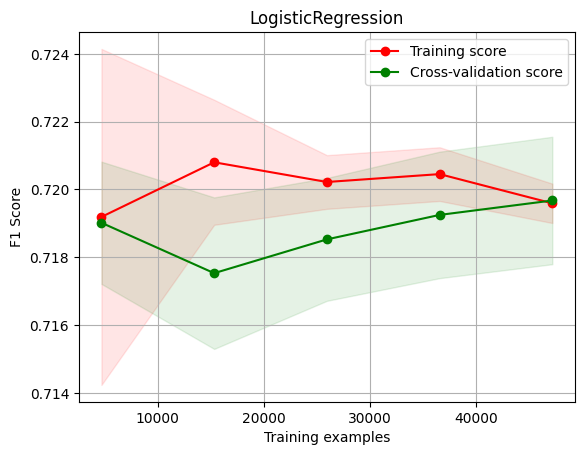

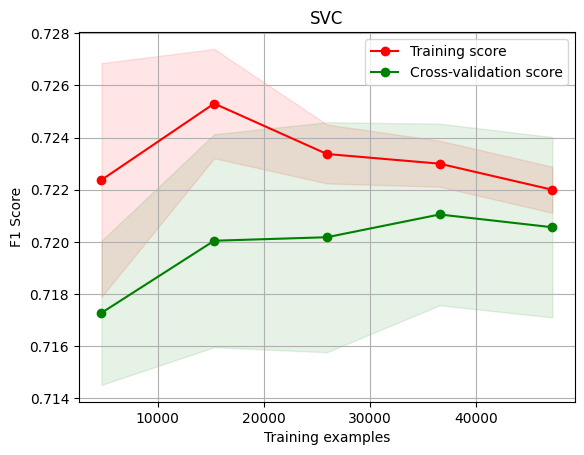

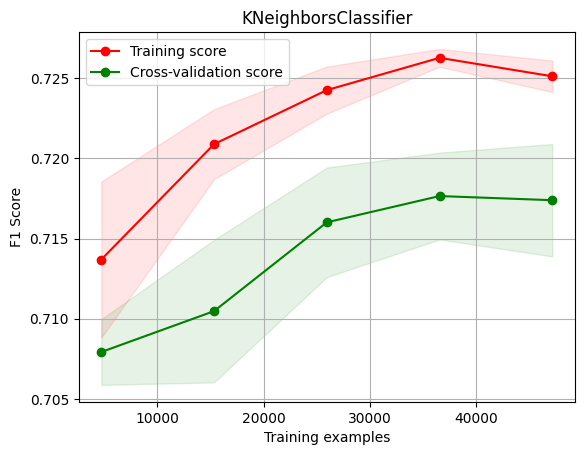

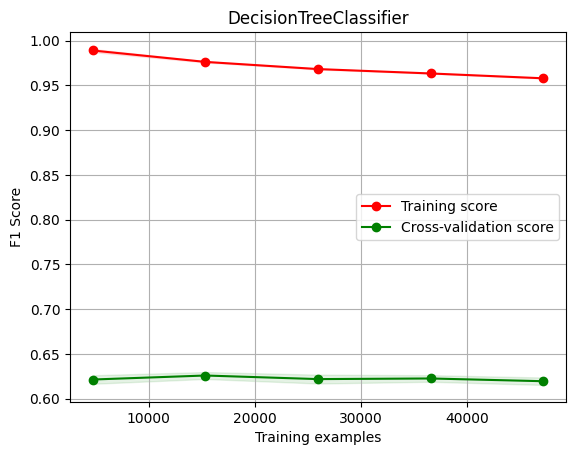

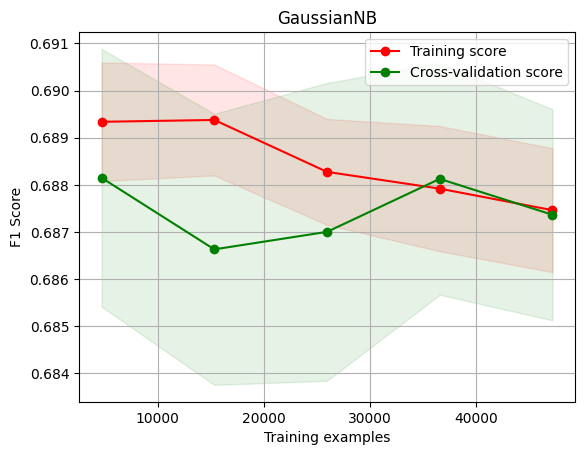

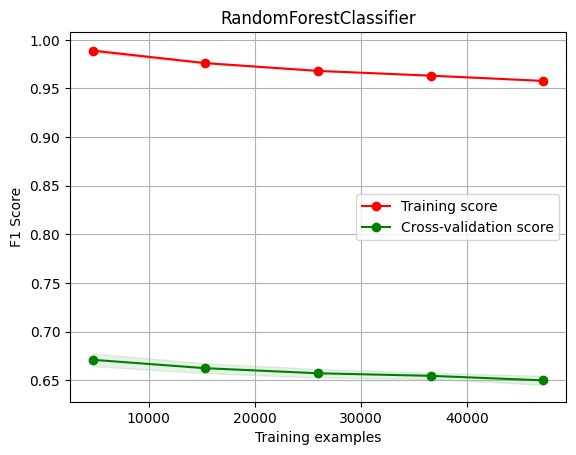

In [ ]:
for model in modelss:
    plot_learning_curve(model, type(model).__name__, X, y, cv = 5)

In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score

# def drawROC(y_test,prediction):
# # Tính toán ROC curve
#   fpr, tpr, thresholds = roc_curve(y_test,prediction)

#   # Vẽ biểu đồ ROC
#   plt.plot(fpr, tpr, label='ROC Curve')
#   plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
#   plt.xlabel('False Positive Rate')
#   plt.ylabel('True Positive Rate')
#   plt.title('Receiver Operating Characteristic (ROC) Curve')
#   plt.legend()
#   plt.show()

#   # Tính toán diện tích dưới đường cong ROC (AUC)
#   auc = roc_auc_score(y_test, prediction)
#   print('AUC Score:', auc)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
logistic = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1','l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter':[100,200,300],

}

logistic_grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring=f1w_score, verbose=1)

logistic_grid_search.fit(X_train, y_train)

print("Best parameters found:")
print(logistic_grid_search.best_params_)

print("Best cross-validation F1 score: {:.2f}".format(logistic_grid_search.best_score_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation F1 score: 0.72


In [ ]:
# svc = SVC()

# param_grid = {
#     'C': [0.01, 0.1, 1, 5, 10, 20],  # Regularization parameter
#     'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
#     'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly'
# }

# svc_grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring=f1w_score, verbose=1)

# # Perform grid search
# svc_grid_search.fit(X, y)

# # Print the best parameters found
# print("Best parameters found:")
# print(svc_grid_search.best_params_)

# # Print the best score found
# print("Best cross-validation F1 score: {:.2f}".format(svc_grid_search.best_score_))

#Xử lý dữ liệu để xem vùng nhiễu làm cho mô hình có độ chính xác thấp

In [ ]:
incorrect_predictions = X_test[((y_test == 1) & (lr_prediction == 0)) | ((y_test == 0) & (lr_prediction == 1))]
incorrect_predictions.head()

,age,bmi,ap_hi,ap_lo,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,assign_age_0,assign_age_1,assign_age_2,assign_bmi_0,assign_bmi_1,assign_bmi_2,assign_bmi_3
5438,0.538462,0.385719,0.375,0.375,0,0,1,0,0,1,0,1,0,0,1,0,0
8127,0.423077,0.604696,0.625,0.625,1,0,0,1,0,0,0,1,0,0,0,1,0
19338,0.615385,0.415635,0.375,0.375,1,0,0,1,0,0,0,1,0,0,1,0,0
38109,0.153846,0.452601,0.250,0.125,1,0,0,1,0,0,0,1,0,0,0,1,0
52223,0.923077,0.447339,0.375,0.375,1,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
incorrect_predictions = X_test[((y_test == 1) & (lr_prediction == 0))]
incorrect_predictions[['ap_hi','ap_lo', 'assign_bmi_0',	'assign_bmi_1',	'assign_bmi_2',	'assign_bmi_3','assign_age_0', 'assign_age_1', 'assign_age_2']].value_counts()

ap_hi   ap_lo  assign_bmi_0  assign_bmi_1  assign_bmi_2  assign_bmi_3  assign_age_0  assign_age_1  assign_age_2
0.3750  0.375  0             1             0             0             0             1             0               413
                             0             1             0             0             1             0               398
                                           0             1             0             1             0               192
0.2500  0.125  0             1             0             0             0             1             0                71
                             0             1             0             0             1             0                65
                                                                                                                  ... 
0.1875  0.375  0             1             0             0             0             1             0                 1
0.3750  0.350  1             0             0           

In [ ]:
correct_predictions = X_test[((y_test == 1) & (lr_prediction == 1))]
correct_predictions2 = correct_predictions.copy()
tim = correct_predictions2[(correct_predictions2['ap_hi'] == 0.375) & (correct_predictions2['ap_lo'] == 0.375) & (correct_predictions2['assign_bmi_1'] == 1) & (correct_predictions2['assign_age_1'] == 1)]
tim

,age,bmi,ap_hi,ap_lo,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,assign_age_0,assign_age_1,assign_age_2,assign_bmi_0,assign_bmi_1,assign_bmi_2,assign_bmi_3
35046,0.807692,0.383239,0.375,0.375,0,0,1,0,0,1,0,1,0,0,1,0,0
43887,0.730769,0.373737,0.375,0.375,0,0,1,1,0,0,0,1,0,0,1,0,0
155,0.269231,0.313925,0.375,0.375,0,0,1,1,0,0,0,1,0,0,1,0,0
47035,0.423077,0.406287,0.375,0.375,0,0,1,1,0,0,0,1,0,0,1,0,0
34284,0.730769,0.209775,0.375,0.375,0,0,1,0,0,1,0,1,0,0,1,0,0
47906,0.653846,0.402878,0.375,0.375,0,0,1,0,0,1,0,1,0,0,1,0,0
35484,0.730769,0.372006,0.375,0.375,0,0,1,0,0,1,0,1,0,0,1,0,0
41094,0.807692,0.413119,0.375,0.375,0,0,1,1,0,0,0,1,0,0,1,0,0
39751,0.346154,0.390482,0.375,0.375,0,0,1,1,0,0,0,1,0,0,1,0,0
7687,0.807692,0.334228,0.375,0.375,0,0,1,1,0,0,0,1,0,0,1,0,0


Dữ liệu đoán đúng chỉ tập trung vào cholesterol_3 và tất cả các dữ liệu cholesterol_1 và cholesterol_2 nó đều đoán là không bệnh

In [ ]:
incorrect_predictions2 = incorrect_predictions.copy()
tim2 = incorrect_predictions2[(incorrect_predictions2['ap_hi'] == 0.375) & (incorrect_predictions2['ap_lo'] == 0.375) & (incorrect_predictions2['assign_bmi_1'] == 1) & (incorrect_predictions2['assign_age_1'] == 1)]
tim2 = tim2[tim2['cholesterol_1'] == 1]
tim2.shape

(372, 17)

In [ ]:
data2 = df_feature
data2 = data2.drop(data2[(data2['ap_lo'] == 0.375) & (data2['ap_hi'] == 0.375) & (data2['assign_age_1'] == 1) & (data2['assign_bmi_1'] == 1)& (data2['cholesterol_1'] == 1)].index)
data2

,age,bmi,ap_hi,ap_lo,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,assign_age_0,assign_age_1,assign_age_2,assign_bmi_0,assign_bmi_1,assign_bmi_2,assign_bmi_3
0,0.423077,0.296462,0.2500,0.375,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0.615385,0.809617,0.6250,0.625,1,0,0,1,1,0,0,0,1,0,0,0,0,1
2,0.500000,0.357463,0.5000,0.125,1,0,0,1,1,0,0,0,1,0,0,1,0,0
3,0.346154,0.563455,0.7500,0.875,1,1,0,0,1,0,0,0,1,0,0,0,1,0
4,0.807692,0.590149,0.3750,0.375,0,0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58945,0.576923,0.363546,0.5000,0.625,1,1,0,0,1,0,0,0,1,0,0,1,0,0
58946,0.730769,0.590152,0.7500,0.375,1,1,0,0,1,0,0,0,1,0,0,0,1,0
58947,0.538462,0.492858,0.3750,0.375,0,1,0,0,1,0,0,0,1,0,0,0,1,0
58948,0.846154,0.499661,0.5625,0.375,1,1,0,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
data2['cardio'].value_counts()

cardio
1    28182
0    24846
Name: count, dtype: int64

In [ ]:
data2_0=data2[data2['cardio']==0]
data2_1=data2[data2['cardio']==1]
data2_1=data2_1.sample(24846)
data2=pd.concat([data2_0,data2_1],axis=0)
data2

,age,bmi,ap_hi,ap_lo,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,assign_age_0,assign_age_1,assign_age_2,assign_bmi_0,assign_bmi_1,assign_bmi_2,assign_bmi_3
0,0.423077,0.296462,0.250,0.375,0,1,0,0,1,0,0,0,1,0,0,1,0,0
4,0.807692,0.590149,0.375,0.375,0,0,1,0,0,1,0,0,1,0,0,0,1,0
5,0.846154,0.920560,0.500,0.375,0,0,0,1,1,0,0,0,0,1,0,0,0,1
7,0.346154,0.552784,0.250,0.125,0,1,0,0,1,0,0,0,1,0,0,0,1,0
8,0.884615,0.535730,0.375,0.375,0,1,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43180,0.961538,0.693989,0.500,0.375,1,0,0,1,0,1,0,0,0,1,0,0,0,1
17246,0.192308,0.333113,0.500,0.375,1,1,0,0,1,0,0,0,1,0,0,1,0,0
46671,0.384615,0.778078,0.500,0.375,1,1,0,0,1,0,0,0,1,0,0,0,0,1
51962,0.923077,0.278515,0.375,0.125,1,1,0,0,1,0,0,0,0,1,0,1,0,0


In [ ]:
data2=data2.sample(frac=1, random_state=42)
data2

,age,bmi,ap_hi,ap_lo,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,assign_age_0,assign_age_1,assign_age_2,assign_bmi_0,assign_bmi_1,assign_bmi_2,assign_bmi_3
58866,0.423077,0.820569,0.375,0.375,0,1,0,0,0,1,0,0,1,0,0,0,0,1
23487,0.653846,0.557033,0.625,0.375,0,0,1,0,1,0,0,0,1,0,0,0,1,0
33247,0.461538,0.450110,0.125,0.375,0,1,0,0,1,0,0,0,1,0,0,0,1,0
353,0.038462,0.648683,0.250,0.125,0,1,0,0,1,0,0,1,0,0,0,0,0,1
9688,1.000000,0.422717,0.250,0.125,0,1,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26693,0.038462,0.663806,0.375,0.375,0,1,0,0,1,0,0,1,0,0,0,0,0,1
43272,0.807692,0.380632,0.875,0.875,1,1,0,0,1,0,0,0,1,0,0,1,0,0
33537,0.192308,0.252671,0.875,0.625,1,0,1,0,1,0,0,0,1,0,0,1,0,0
2016,0.307692,0.402920,0.500,0.375,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
XX=data2.drop('cardio',axis=1)
yy=data2['cardio']

In [ ]:
XX.shape

(49692, 17)

In [ ]:
# dataset_resampled, label_resampled = smote.fit_resample(XX, yy)

# X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(dataset_resampled, label_resampled, test_size=0.2, stratify=label_resampled, random_state=42)


In [ ]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(XX,yy, test_size=0.2, random_state=42)

In [ ]:
X_train_resampled.shape,X_test_resampled.shape,y_train_resampled.shape,y_test_resampled.shape

((39753, 17), (9939, 17), (39753,), (9939,))

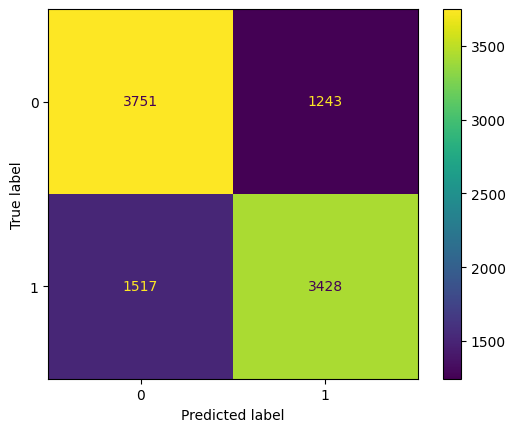

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)
lr_prediction = lr_model.predict(X_test_resampled)
lr_accuracy = (round(accuracy_score(lr_prediction, y_test_resampled), 4) * 100) #percentage
cm = confusion_matrix(y_test_resampled,lr_prediction )
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
report = classification_report(y_test_resampled, lr_prediction)

# In báo cáo
print(report)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      4994
           1       0.73      0.69      0.71      4945

    accuracy                           0.72      9939
   macro avg       0.72      0.72      0.72      9939
weighted avg       0.72      0.72      0.72      9939



In [ ]:
model=[LogisticRegression()]

In [ ]:
cross_val_model(XX, yy, model)

LogisticRegression
CV F1 scores: [0.722 0.721 0.725 0.727 0.713]
Mean CV F1: 0.722
CV F1 STDEV: 0.005
CV F1 Deviation: 0.014


[[0.7197312  0.71984685 0.7240494  0.71824488 0.71994723]
 [0.71766952 0.72046881 0.72053755 0.7171933  0.72012145]
 [0.72147586 0.72010186 0.71979032 0.71910063 0.72076395]
 [0.72199241 0.72275512 0.72141292 0.72064357 0.72400924]
 [0.72187338 0.72178485 0.72158565 0.72074817 0.72340549]]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

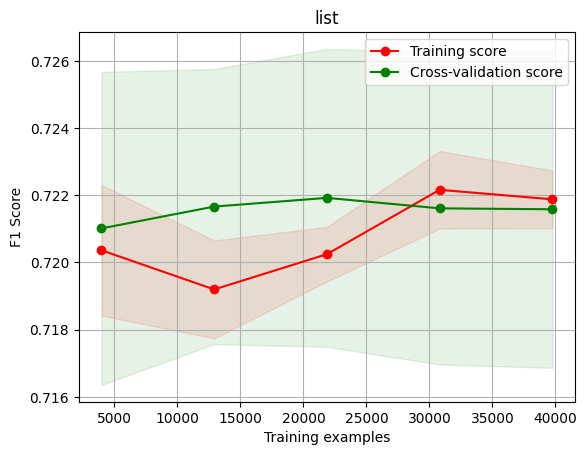

In [ ]:
plot_learning_curve(LogisticRegression(), type(model).__name__, XX, yy, cv = 5)

In [ ]:
logistic = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularisasi parameter
    'penalty': ['l1','l2'],  # Tipe regularisasi
    'solver': ['liblinear'], # Solver yang digunakan untuk penyelesaian
    'max_iter':[100,200,300]
}

# Inisialisasi GridSearchCV
logistic_grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring=f1w_score, verbose=1)

logistic_grid_search.fit(XX, yy)

print("Best parameters found:")
print(logistic_grid_search.best_params_)

print("Best cross-validation F1 score: {:.2f}".format(logistic_grid_search.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:
{'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation F1 score: 0.72


#Train mô hình lại với siêu tham số

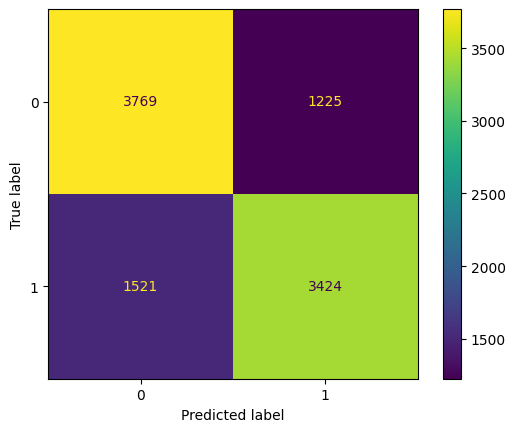

In [ ]:
lr_model = LogisticRegression(C= 0.1, max_iter= 200, penalty = 'l1', solver= 'liblinear')
lr_model.fit(X_train_resampled, y_train_resampled)
lr_prediction = lr_model.predict(X_test_resampled)
lr_accuracy = (round(accuracy_score(lr_prediction, y_test_resampled), 4) * 100) #percentage
cm = confusion_matrix(y_test_resampled,lr_prediction )
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
report = classification_report(y_test_resampled, lr_prediction)

# In báo cáo
print(report)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      4994
           1       0.74      0.69      0.71      4945

    accuracy                           0.72      9939
   macro avg       0.72      0.72      0.72      9939
weighted avg       0.72      0.72      0.72      9939



In [ ]:
lr_accuracy

72.37

In [ ]:
def du_doan(a):
  a = pd.DataFrame(a);
  a['assign_age']=a['age'].apply(assign_age_group)
  a['assign_bmi']=a['bmi'].apply(assign_bmi_group)
  encoded_features = pd.DataFrame()
  column=['cholesterol','gluc', 'assign_age', 'assign_bmi']
  a.drop(column, axis=1, inplace=True)
  a[['cholesterol_1',
        'cholesterol_2', 'cholesterol_3','gluc_1', 'gluc_2', 'gluc_3', 'assign_age_0', 'assign_age_1',
        'assign_age_2', 'assign_bmi_0', 'assign_bmi_1', 'assign_bmi_2',
        'assign_bmi_3']]= [1,0,0,1,0,0,1,0,0,0,1,0,0]
  numerical_cols = ['age','bmi','ap_hi','ap_lo']
  a[numerical_cols] = scaler.transform(a[numerical_cols])
  XXX = a.drop('cardio',axis=1)
  YYY = a['cardio']
  lr_prediction = lr_model.predict(XXX)
  print(lr_prediction)

a = {
    'age' : [20],
    'bmi' : [22],
    'ap_hi' : [120],
    'ap_lo' : [80],
    'cholesterol' : [1],
    'gluc' : [1],
    'cardio': [0]
}
du_doan(a)

[0]
